## Comparing Machine Learning Classification Algorithms for Predicting Heart Failure
#### Name - Isha Ela Chinniah
#### Machine Learning; Spring 2023

## Introduction

#### Project Relevance - 
The application area of this project is in the medical field – specifically in the diagnosis of heart diseases. Accurately diagnosing heart diseases can aid in early intervention and the use of appropriate treatments. This project has the potential to improve patient outcomes by identifying high-risk patients early on and providing them with appropriate care. The use of machine learning in this project can work towards analyzing vast amounts of data, identifying complex patterns in the data, and make predictions within the health sector. The models would ultimately take steps towards personalized medical assistance for individuals by using their clinical and demographic data for prognosis and medical intervention. 

#### Project Goal -
The goal of this project is to use machine learning models to accurately predict patient outcomes with regards to heart diseases using clinical and demographic data; the success criteria for this project is to achieve an accuracy rate of around 80% in identifying high-risk patients who need intense care due to heart failure. Additionally, feature selection will be performed to prevent overfitting the models by identifying significant features in predicting patient outcomes. Finally, a wide range of classification models will be employed and compared to identify ones which have the highest accuracy in predicting patient outcomes using the selected features from the dataset. 

#### Dataset Description - 

The datasets consists of clinical and demographic information on 299 patients in Pakistan who suffered from heart failure in 2015. The raw data consists of 13 features - 12 of these are factors that can potentially predict the target feature which is the death event in a patient.

-> Age - The age of the patient in years

-> Anemia - Decrease of red blood cells / haemaglobin (1 present,0 absent)

-> High blood pressure - If a patient has hypertension (1 present, 0 absent)

-> Creatinine phosphokinase - Level of the CPK enzyme in the blood in mgl/L (micrograms per liter)

-> Diabetes - If the patient has diabetes (1 present, 0 absent)

-> Ejection fraction - Percentage of blood leaving the heart upon each contraction 

-> Sex - Male or Female (1 male, 0 female)

-> Platelets - Platelet counts in the blood in kiloplatelets/mL

-> Serum creatinine - Level of creatinine in the blood in mg/dL

-> Serum sodium - Level of sodium in the blood in mEq/L (miliequivalent per liter)

-> Smoking - If the patient smokes (1 smokes, 0 doesn't smoke)

-> Time - Follow-up period in days

-> Death event (target) - If the patient died during the follow-up period 


### Load and View the Heart Failure dataset

In [291]:
import pandas as pd
import numpy as np

# Read the data file into a pandas DataFrame
data = pd.read_csv('heart_failure_clinical_records_dataset.csv', header=None, na_values='?')

# Replace missing values with NaN
data.replace('?', np.nan, inplace=True)
# Drop any rows with missing values
data.dropna(inplace=True)

# Display the first few rows of the DataFrame
print(data.head())

    0        1                         2         3                  4   \
0  age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
1   75        0                       582         0                 20   
2   55        0                      7861         0                 38   
3   65        0                       146         0                 20   
4   50        1                       111         0                 20   

                    5          6                 7             8    9   \
0  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex   
1                    1     265000               1.9           130    1   
2                    0  263358.03               1.1           136    1   
3                    0     162000               1.3           129    1   
4                    0     210000               1.9           137    1   

        10    11           12  
0  smoking  time  DEATH_EVENT  
1        0     4            1  
2        0    

In [292]:
# Select the target value column
y = data.iloc[1:, 12].values

# Extract the remaining 12 features
X_full = data.iloc[1:,0:12].values

## Feature Selection 

Feature selection is an important tool used to identify significant features that can help predict the target variable outcome in a model; reducing the number of features in a model can prevent overfitting and allow generalization of models. 

### Mutual Information Feature Selection

The mutual information feature selection technique can be used to identify features that provide a lot of information about the target variable - features with the highest score are more closely related to the target variable. Finally, the features with highest mutual information scores are depicted in a bar graph. 

Selected features:
age 0.05379026973912482
creatinine_phosphokinase 0.03854224699722053
ejection_fraction 0.07108087665950036
serum_creatinine 0.1058299234400153
smoking 0.01105129190960441
time 0.24281706671216785


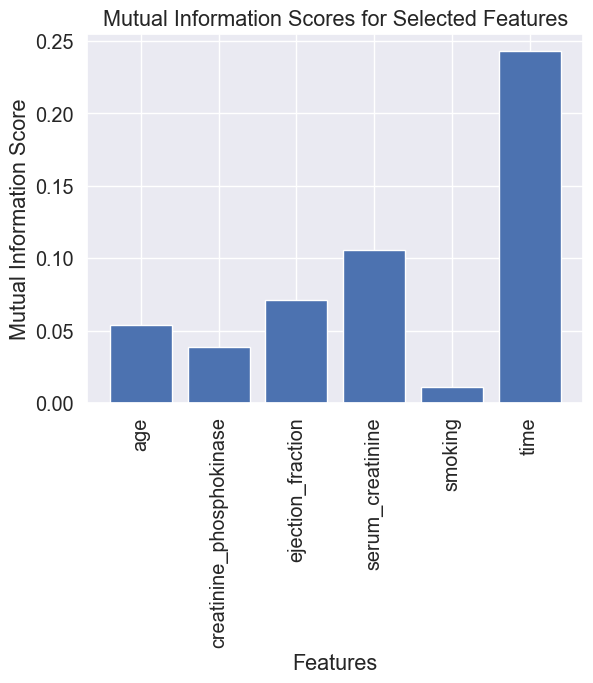

In [293]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

# Perform mutual information feature selection
selector = SelectKBest(mutual_info_classif, k=6)
selector.fit(X_full, y)

# Extract the selected feature indices
selected_features = selector.get_support(indices=True)

# Get the mutual information scores of the features
scores = selector.scores_[selected_features]

# Print the names and scores of the selected features
feature_names = data.iloc[0, :-1]
selected_feature_names = feature_names[selected_features]
print("Selected features:")
for name, score in zip(selected_feature_names, scores):
    print(name, score)

# Plot the mutual information scores
plt.bar(selected_feature_names, scores)
plt.title("Mutual Information Scores for Selected Features")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=90)
plt.show()


### Pearson's Correlation Feature Selection

The Pearson's correlation test can be used to determine the strength of correlation between each feature and the target variable. Features with strong correlation to the target variable can make more accurate predictions in a model and therefore should be selected. 

In [294]:
# Perform Pearson's correlation test on all features
correlations = []
for i in range(X_full.shape[1]):
    feature_name = data.iloc[0, i]
    feature_values = X_full[:, i]
    corr = np.corrcoef(feature_values.astype(float), y.astype(float))[0, 1]
    correlations.append(corr)
    print('Feature:', feature_name)
    print('Pearson correlation coefficient:', corr)
    print('------------------')

# Select the features with high correlation coefficient with the target
selected_features = []
for i, corr in enumerate(correlations):
    if abs(corr) >= 0.2:
        selected_features.append(data.iloc[0, i])

# Print the selected features
print('Selected features:', selected_features)


Feature: age
Pearson correlation coefficient: 0.2537285430880036
------------------
Feature: anaemia
Pearson correlation coefficient: 0.06627009846028802
------------------
Feature: creatinine_phosphokinase
Pearson correlation coefficient: 0.06272816025237468
------------------
Feature: diabetes
Pearson correlation coefficient: -0.001942883344203445
------------------
Feature: ejection_fraction
Pearson correlation coefficient: -0.2686033123940617
------------------
Feature: high_blood_pressure
Pearson correlation coefficient: 0.07935105769128538
------------------
Feature: platelets
Pearson correlation coefficient: -0.04913886798037423
------------------
Feature: serum_creatinine
Pearson correlation coefficient: 0.29427756098414937
------------------
Feature: serum_sodium
Pearson correlation coefficient: -0.19520359641640134
------------------
Feature: sex
Pearson correlation coefficient: -0.00431637631970289
------------------
Feature: smoking
Pearson correlation coefficient: -0.01262

A Pearson's Correlation heatmap visually identifys pairs of features that are strongly correlated to each other. Features with strong correlation to each other can result in multicollinearity in the fitted models leading to less reliable outcomes. 

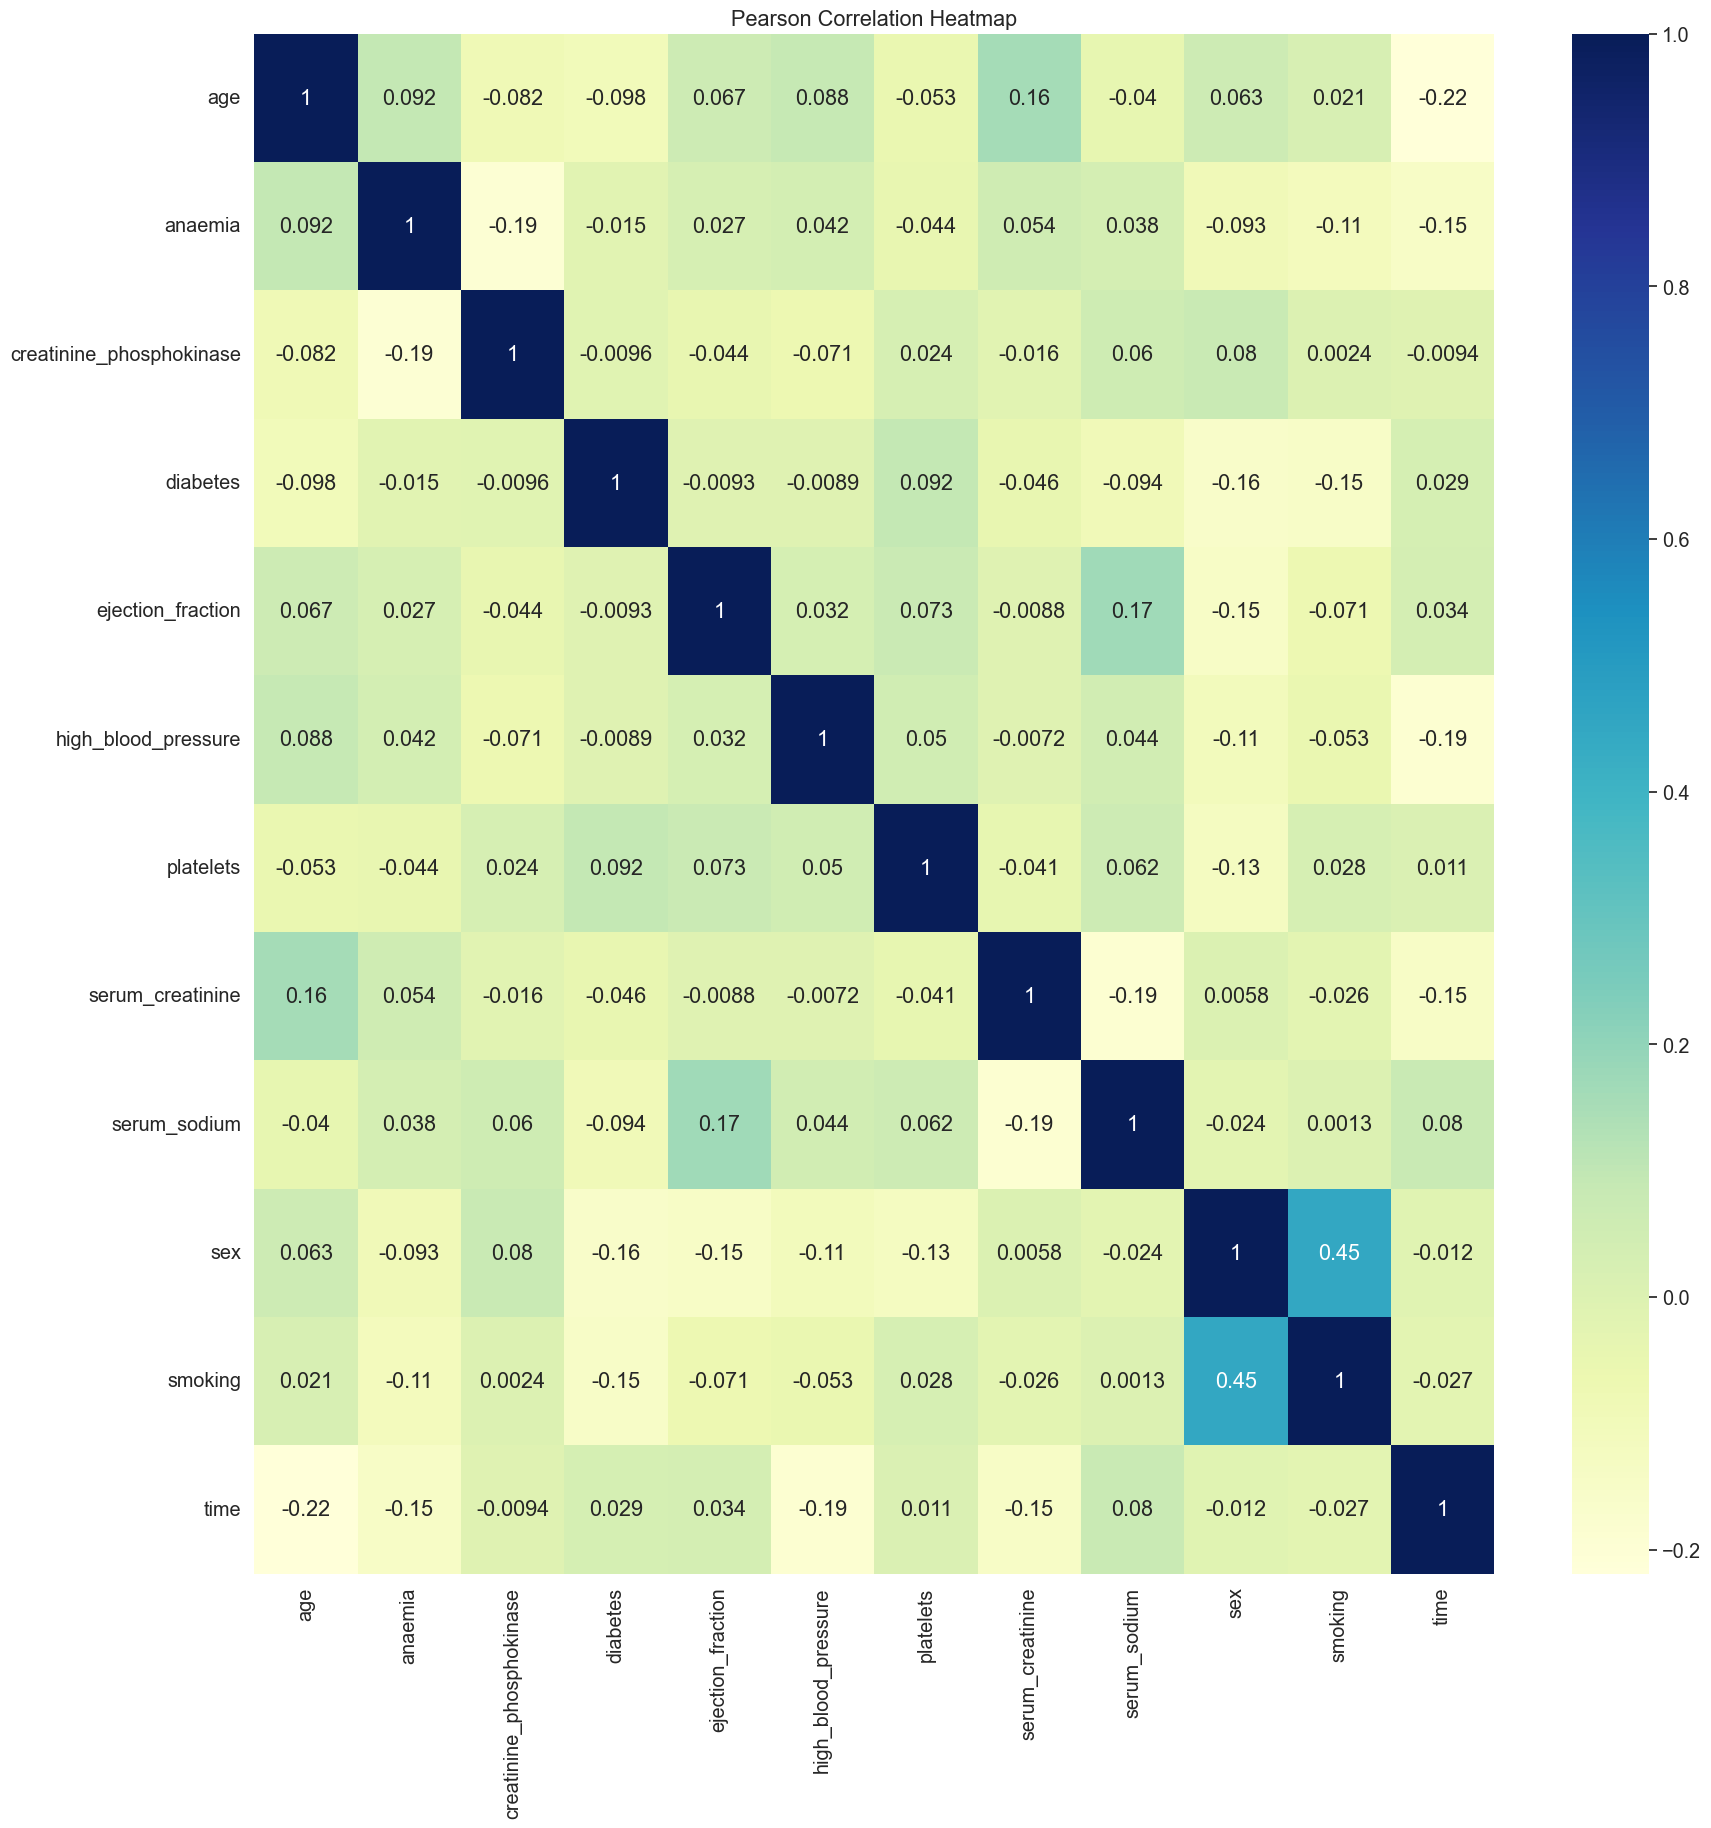

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the dataframe 
data_new = data.copy()

# Extract the feature names
feature_names = data_new.iloc[0, 0:12]

# Convert non-numeric columns to numeric
for col in data_new.columns:
    if not pd.api.types.is_numeric_dtype(data_new[col]):
        data_new[col] = pd.to_numeric(data_new[col], errors='coerce')

# Drop any rows with missing values
data_new.dropna(inplace=True)

# Select the target value column
y_new = data_new.iloc[1:, 12].values

# Extract the remaining 12 features and their names
X_new = data_new.iloc[1:,0:12].values

# Compute the correlations
correlations = np.corrcoef(X_new, rowvar=False)

# Plot the correlations
plt.figure(figsize=(20,20))
sns.set(font_scale=1.3)
sns.heatmap(correlations, cmap="YlGnBu", xticklabels=feature_names, yticklabels=feature_names, annot=True)
plt.title("Pearson Correlation Heatmap")
plt.show()


Age, Ejection Fraction, Serum Creatinine, and Time were significant features identified across both feature selection techniques. The Time feature describes the follow-up time since the first hospital visit and is strongly correlated to the target variable; however it is not helpful in identifying high-risk patients for heart failure and instead can be a preventive measure to consider after identifying such patients. The remaining 3 features appear to be relevant clinical and demographic information that can be used to make predictions about heart failure in patients.

Finally, high correlation (>0.5) was not observed between any of these features from the Pearson's Correlation heatmap thus preventing multicollinearity in fitting the models with the identified features.

## Fitting models with selected features

The models will be fit using the 'Age', 'Ejection Fraction' and 'Serum Creatinine' variables. 70% of the data will be used to train the different models, and the remaining 30% will be used as testing data to evaluate the accuracy of the models.

In [296]:
# Extract the target value column
y = data.iloc[1:, 12].values

# Extract the features age, serum_creatinine, and ejection_fraction
X = data.iloc[1:, [0, 4, 7]].values

# Divide the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### Create pipelines for each of the classifiers

A wide range of machine learning classification techniques will be employed and compared to identify the ones with the highest classification accuracy.

1) Logistic regression model: The logistic regression model uses a sigmoid function to classify data points based on the probability of which class they belong to.

2) Perceptron model: The perceptron model performs binary classification by finding linear separation between the classes.

3) Decision tree classifier: The decision tree model classifies data points using a sequence of conditional statements. 

4) Random Forest classifier: The random forest classifier constructs many decsison trees during training and classifies data points based on the class selected by the most decsision trees.

5) K-nearest neighbour classifier: The K-nearest neighbour model uses the proximity of a data point to other points to classify it.

The Standard Scalar function is called on certain machine learning models to improve performance and convergence. the Standard Scalar method is called before the machine learning model to preprocess the data whereby the features are standardized by scaling them to unit variance and removing the mean. 

In [297]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# create a pipeline for the logistic regression model using standardized data
pipe1 = make_pipeline(StandardScaler(), LogisticRegression(C=1000.0, solver='lbfgs', multi_class='ovr'))

# create a pipeline for the perceptron model using standardized data
pipe2 = make_pipeline(StandardScaler(), Perceptron(eta0=1.0, random_state=1))

# create a pipeline for the Decision tree classifier
pipe3 = make_pipeline(DecisionTreeClassifier(max_depth=6,
                                             criterion='entropy',
                                             random_state=0))

# create a pipeline for the Random Forest classifier
pipe4 = make_pipeline(RandomForestClassifier())

# create a pipeline for the K-nearest neighbour classifier using standardized data
pipe5 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=20,
                                                             p=3,
                                                             metric='minkowski'))

clf_labels = ['Logistic Regression', 'Perceptron', 'Decision tree', 'Random Forest', 'KNN']

### Create an ensemble using all the defined pipelines

The ensemble majority voting method uses the combination of defined model pipelines (logistic regression, perceptron, decision tree, random forest, and k-nearest neighbor) to determine where a data point belongs based on how all of the models classify it.

K-fold-cross-validation is performed on the defined models to evaluate their accuracy on new data and thereby infer their generality. For 10-fold-cross-validation, the data is split into 10 folds and the model is evaluated 10 times each time using a different combination of the 9 folds for training, and 1 for testing. The accuracy scores after running 10-fold CV on the 6 models are printed below.

In [298]:
from sklearn.ensemble import VotingClassifier

mv_clf = VotingClassifier(estimators=[('lr', pipe1), ('p', pipe2), ('dt', pipe3), ('rf', pipe4), ('knn', pipe5)])

clf_labels += ['Majority voting']
all_clf = [pipe1, pipe2, pipe3, pipe4, pipe5, mv_clf]

# perform k-fold-cross-validation on each pipeline and the ensemble
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")

Accuracy: 0.8 Stdev: 0.115 [Logistic Regression]
Accuracy: 0.68 Stdev: 0.095 [Perceptron]
Accuracy: 0.76 Stdev: 0.095 [Decision tree]
Accuracy: 0.76 Stdev: 0.104 [Random Forest]
Accuracy: 0.79 Stdev: 0.093 [KNN]


/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

Accuracy: 0.79 Stdev: 0.095 [Majority voting]


/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Testing set classification accuracy

Testing set classification accuracy is an important metric to understand how the models are expected to perform on new unseen data. 30% of the data was set aside as testing data and was not used during the training process of the models. Classification accuracy is then calculated by comparing the predicted class labels of the model with the true class lables in the testing data; the accuracy is defined as the number of correct predictions divided by the total number of instances in the testing data. The testing set classification accuracies are calculated and printed for each of the 6 classification techniques.

#### Logistic regression model accuracy performance

In [299]:
pipe1.fit(X_train, y_train)

y_pred = pipe1.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe1.score(X_test, y_test))

Misclassified test set examples: 30
Out of a total of: 90
Accuracy: 0.6666666666666666


#### Perceptron model accuracy performance

In [300]:
pipe2.fit(X_train, y_train)

y_pred = pipe2.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe2.score(X_test, y_test))

Misclassified test set examples: 34
Out of a total of: 90
Accuracy: 0.6222222222222222


#### Decesion tree classifier accuracy performance

In [301]:
pipe3.fit(X_train, y_train)

y_pred = pipe3.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe3.score(X_test, y_test))

Misclassified test set examples: 32
Out of a total of: 90
Accuracy: 0.6444444444444445


#### Random Forest classifier accuracy performance

In [302]:
pipe4.fit(X_train, y_train)

y_pred = pipe4.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe4.score(X_test, y_test))

Misclassified test set examples: 26
Out of a total of: 90
Accuracy: 0.7111111111111111


#### K-nearest-neighbors classifier accuracy performance

In [303]:
pipe5.fit(X_train, y_train)

y_pred = pipe5.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe5.score(X_test, y_test))

Misclassified test set examples: 29
Out of a total of: 90
Accuracy: 0.6777777777777778


/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

#### Ensemble majority voting method performance

In [304]:
mv_clf.fit(X_train, y_train)

y_pred = mv_clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', mv_clf.score(X_test, y_test))

Misclassified test set examples: 25
Out of a total of: 90
Accuracy: 0.7222222222222222


/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

## Results

The accuracy results from the 10-fold-cross-validation technique and testing data classification process are visually represented in a bar graph. 

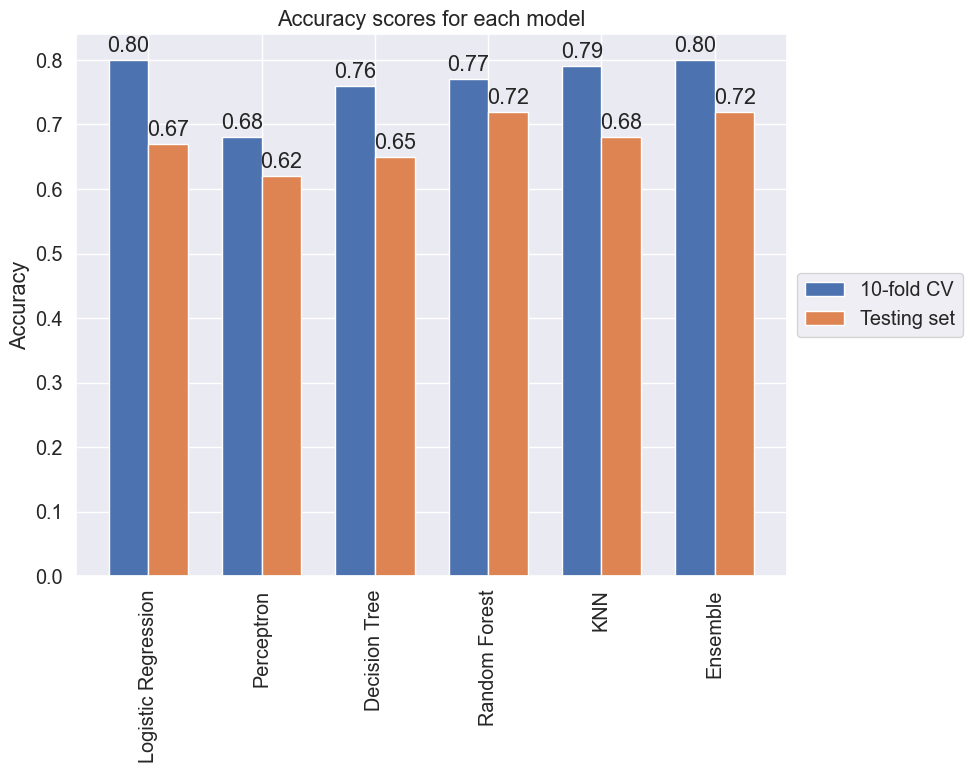

In [305]:
import matplotlib.pyplot as plt
import numpy as np

# Define the accuracy scores for each pipeline and the ensemble
cv_scores = [0.8, 0.68, 0.76, 0.77, 0.79, 0.8]
test_scores = [0.67, 0.62, 0.65, 0.72, 0.68, 0.72]

# Set the labels for the x-axis
labels = ['Logistic Regression', 'Perceptron', 'Decision Tree', 'Random Forest', 'KNN', 'Ensemble']

# Create the bar graph
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, cv_scores, width, label='10-fold CV')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing set')

# Add labels, axis, and legend
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy scores for each model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add the accuracy values above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Display the plot
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

k-fold cross validation results - According to the cross-validation results, the logistic regression model and ensemble majority voting method had the highest classification accuracy of 80%.

Testing Data Results - The Random Forest classifier and ensemble majority voting method had the highest classification accuracy on the testing set; they had an accuracy score of 72% with 25 misclassified testing data points.

While none of the models obtained a classification accuracy of 80% on the testing data (as per the initial success criteia), a 70% accuracy rate using only 3 features is significant. The logistic regression and random forest models generally performed well under both accuracy measures and the ensemble majority voting model matched their high accuracy scores. 

Given that logistic regression is a probabilistic estimate of certainty that a data point belongs to a class, it becomes ideal in calculating chances of diseases given symptoms. Therefore, the logistic regression model could be used to determine the probability of heart failure leading to death, as a risk factor, given information on a patient's age, serum creatinine, and ejection fraction. Further analysis on this model could increase its accuracy and reveal areas for its improvement.

### Hyperparameter tuning

The process of hyperparameter tuning works to select optimal hyperparameters that yield the best performance and generalization of the machine learning model. 

Although logistic regression does not have critical hyperparameters to tune, there are some factors such as C, solver, and penalty that can influence model performance or coverage. 

The gridsearch hyperparameter tuning method involves specifying a set of possible values for each hyperparameter and then evaluating the model performance for each combination of hyperparameters. The best parameters are finally printed along with the highest achieved accuracy values. 

In [306]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define the pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Define the hyperparameters to tune
hyperparameters = {
    'logisticregression__C': [0.1, 1, 10, 100, 1000],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__penalty': ['none', 'l1', 'l2', 'elasticnet']
}

# Perform grid search
clf = GridSearchCV(pipe, hyperparameters, cv=10)
clf.fit(X_train, y_train)

# Print the best parameter and accuracy scores
print('Best parameters:', clf.best_params_)
print('Best cv score:', clf.best_score_)
print('Accuracy on testing set:', clf.score(X_test, y_test))


/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shonali/opt/anaconda3/lib/python3

/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/shonali/opt/anaconda3/lib/python3

Best parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Best cv score: 0.8185714285714287
Accuracy on testing set: 0.6777777777777778


/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/shonali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in

Hyperparameter tuning on the logistic regression model did not significantly change the accuracy scores from the 10-fold CV or testing data. The final accuracy scores obtained were 0.82 for the 10-fold CV and 0.68 for the testing data. 

### Logistic Regression Model Confusion Matrix

The final logistic regression model after hyperparameter tuning is represented in a confusion matrix below to understand the distribution of classified and misclassified data points. 

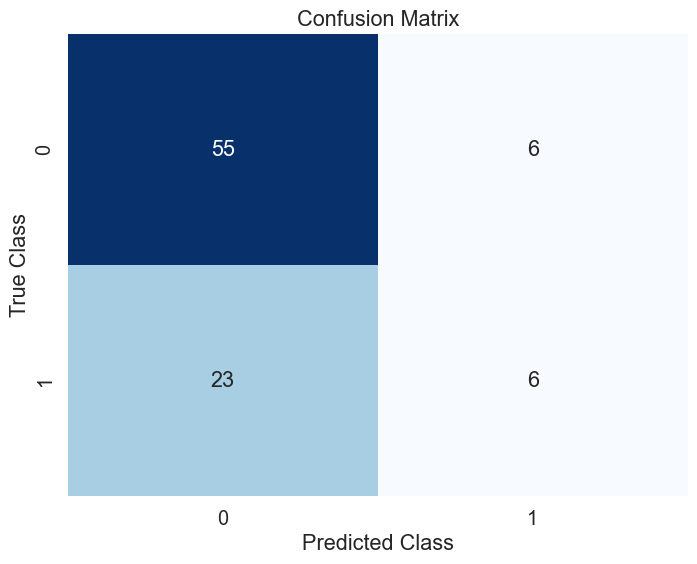

In [309]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Create a pipeline for the final logistic regression model using standardized data and selected hyperparameters
pipe_final = make_pipeline(StandardScaler(), LogisticRegression(C=0.1, solver='liblinear', multi_class='ovr', penalty='l2'))
pipe_final.fit(X_train, y_train)
y_pred = pipe_final.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

The confusion matrix shows that the model has a high accuracy when predicting if a patient would survive heart failure (True Class = 0); however, the model inaccurately predicts when a patient dies from heart failure (True Class = 1) - only correctly classifying the death event 6 times and incorrectly classifying it 23 times.

### Risk Factor Predictions using Logistic Regression Model

The probability estimates of heart failure are extracted from the logistic regression model and appeded to the dataframe as a risk score. These scores are calculated from the logsitic regression model using the hyperparameters selected during hyperparameter tuning to optimize the model performance. Additionally, the model only uses 3 features namely age, serum creatinine, and ejection fraction to arrive at these risk scores. Information from these risk scores can further aid in early intervention and appropriate treatment for patients. 

In [308]:
from sklearn.model_selection import cross_val_predict

# Create a new DataFrame with the selected features
df_final = data.iloc[1:, [0, 4, 7]].copy()

# Set column names
df_final.columns = ['age', 'ejection_fraction', 'serum_creatinine']

# create a pipeline for the final logistic regression model 
pipe_final = make_pipeline(StandardScaler(), LogisticRegression(C=0.1, solver='liblinear', multi_class='ovr', penalty='l2'))
pipe_final.fit(X, y)

# predict the probabilities of heart failure on the test set
y_pred = cross_val_predict(pipe_final, X, y, cv=10, method='predict_proba')

# Add the probabilities to the dataframe
df_final['risk_factor'] = y_pred[:, 1]

# print the updated dataframe
print(df_final.head())

  age ejection_fraction serum_creatinine  risk_factor
1  75                20              1.9     0.742897
2  55                38              1.1     0.248806
3  65                20              1.3     0.585579
4  50                20              1.9     0.516818
5  65                20              2.7     0.747887


## Related works -

The following 2 articles were closely related to my project -


1) APA citation: Chicco, D., & Jurman, G. (2020). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC medical informatics and decision making, 20(1), 1-16.

This research paper used the same dataset as the one in my project, however, the selected methods and final results differed in several ways. The authors perform statistical feature selections such as the Mann-Whiteney U test, Pearson's correlation coefficient, Chi square test and shapiro wilk test to check for normality. They also perform a machine learning feature ranking technique using Random Forests, Support Vector Machines with Gaussian Kernel, and eXtreme Gradient Boosting. The results of their test identified serum creatinine and ejection fraction as significant features across all feature selection methods and they proceeded with theses two features alone. 
The researchers fit several machine learning classification models such as Descision trees, Random forests, Support Vector Machines, and Neural Networks - and identified Random Forests as particularly effective in classifying patient survival with an accuracy rate of around 74% using serum creatinine and ejection fraction alone. 


2) APA citation: Learning, M. (2017). Heart disease diagnosis and prediction using machine learning and data mining techniques: a review. Adv. Comput. Sci. Technol, 10(7), 2137-2159.

This review article provides a comprehensive overview of the application of machine learning and data mining in heart disease diagnosis. The paper discusses the prevelance of heart diseases and highlights the need for accurate diagnosis models. The author describes the importance of data preprocessing and feature selection in these models. The paper further discusses different machine learning techniques that may be applied in heart disease diagnosis - describing more traditional models such as decision trees, support vector machines, and logistic regression, and more complex techniques such as Random Forests, neural networks, and ensembles. The author finally talks about performance evaluation and model interpretability. 
The paper concludes by describing several challenges to heart disease analysis including imbalanced datasets, interpretability of results, and integration of different data sources. The author further calls for more research in this field to improve heart disease diagnosis and prediction.

## Conclusion and Implications -

In this project, feature selection was performed and identified age, serum creatinine, and ejection fraction as relevant clinical and demographic information to make predictions regarding heart failure in patients. 

While comparing different machine learning classification techniques, the ensemble majority voting method using 5 defined pipelines had the highest accuracy rate for k-fold-cross-validation and testing data measures. The logistic regression performed very well under the k-fold-cross-validation metric, and the Random forest classifier achieved high accuracy under the testing data. 

The logistic regression model was selected for further fine tuning due to its probability estimates which make it ideal for determining risk factors associated with heart failure. The final logistic regression model achieved a 10-fold CV accuracy score of 0.82 and testing data classification accuracy of 68%. The model had a higher accuracy in correctly predicting when patients would survive, but it had a lower accuracy and frequently incorrectly predicted when a patient would die from heart failure. The model was finally used to extract probability estimates of heart failure in patients using the 3 selected features age, serum creatinine, and ejection fraction. 

The ability to make accurate predictions related to heart failure using machine learning techniques will improve precision medicine and personalised care. This project worked to use a logistic regression model to calculate risk scores for heart failure based on clinical and demographic data which can further aid in early diagnosis, preventive care, and appropriate treatment.

## Future Work -

One major drawback from the logistic regression model selected was that it inaccurately predicted when patients would die from heart failure. This is a significant issue in the model which needs to be further explored. Moving forward, I would compare confusion matrix results from different classification techniques to try identify the models which have a better accuracy in predicting when patients would die from heart failure. 

Another limitation to this project was the small dataset; moving forward, this project outline should be applied to a larger dataset to ensure the patterns observed in this analysis were not due to chance alone. Additionally, the data was collected from one region, but using data collected from a wide range of places may shed light on clinical features that are closely related to heart diseases across the globe. 
Moving forward, attempts to consolidate data from different sources in a uniform way might be productive in identifying global trends; this would allow researchers to work on larger datasets and identify global patterns related to heart diseases in patients. 